In [22]:
%matplotlib notebook

In [23]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
logs = glob.glob('Processed/*.csv')
logs.sort()

In [25]:
logs

['Processed\\2018-09-17.csv',
 'Processed\\2018-09-18.csv',
 'Processed\\2018-09-19.csv',
 'Processed\\2018-09-20.csv',
 'Processed\\2018-09-25.csv',
 'Processed\\2018-09-26.csv',
 'Processed\\2018-09-27.csv',
 'Processed\\2018-09-28.csv',
 'Processed\\2018-10-02.csv',
 'Processed\\2018-10-03.csv']

In [26]:
interaction_data = {}
for file in logs:
    print(file)
    interaction_data[file] = pd.read_csv(file, header=None)
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\r\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    interaction_data[file][1] = interaction_data[file][2].apply(convert_str_to_matrix)
    interaction_data[file][2] = interaction_data[file][2].apply(convert_str_to_matrix)
    print(interaction_data[file].shape)

Processed\2018-09-17.csv
(3066, 4)
Processed\2018-09-18.csv
(1494, 4)
Processed\2018-09-19.csv
(2308, 4)
Processed\2018-09-20.csv
(1596, 4)
Processed\2018-09-25.csv
(1661, 4)
Processed\2018-09-26.csv
(1564, 4)
Processed\2018-09-27.csv
(1604, 4)
Processed\2018-09-28.csv
(1530, 4)
Processed\2018-10-02.csv
(825, 4)
Processed\2018-10-03.csv
(1426, 4)


In [27]:
interaction_data['Processed\\2018-09-21.csv']

KeyError: 'Processed\\2018-09-21.csv'

In [28]:
interaction_data_all = {}
interaction_data_all['data'] = pd.DataFrame()
interaction_data_all['separate_line'] = []

for key in interaction_data.keys():
    interaction_data_all['data'] = pd.concat([interaction_data_all['data'], interaction_data[key]])
    interaction_data_all['separate_line'].append(len(interaction_data[key]))


<IPython.core.display.Javascript object>


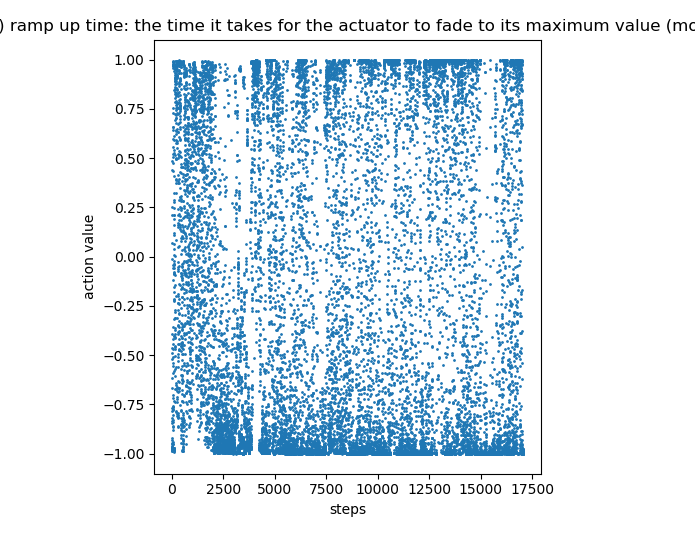

<IPython.core.display.Javascript object>


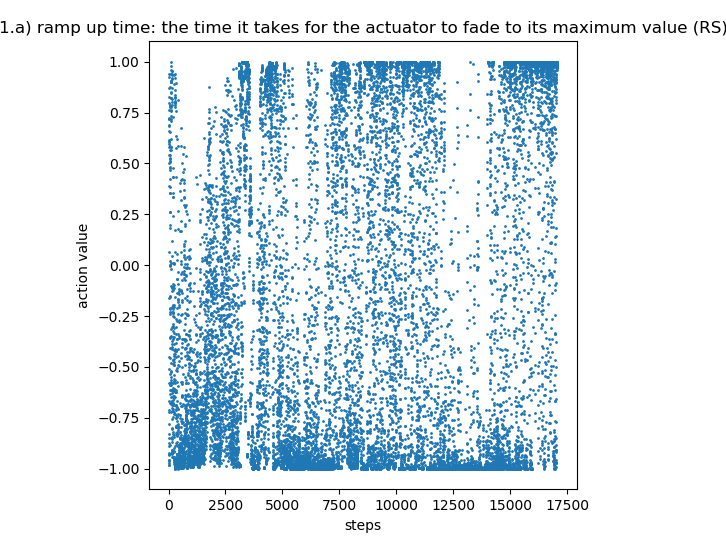

<IPython.core.display.Javascript object>


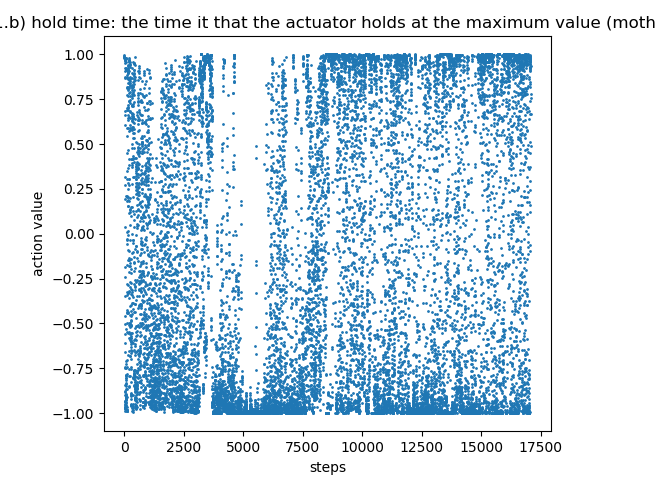

<IPython.core.display.Javascript object>


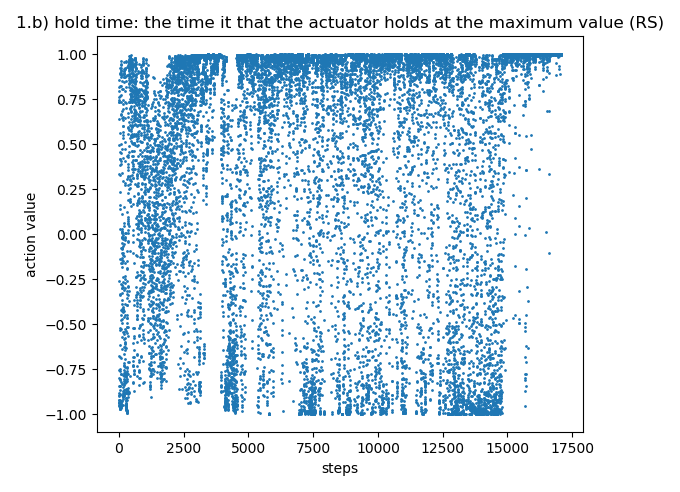

<IPython.core.display.Javascript object>


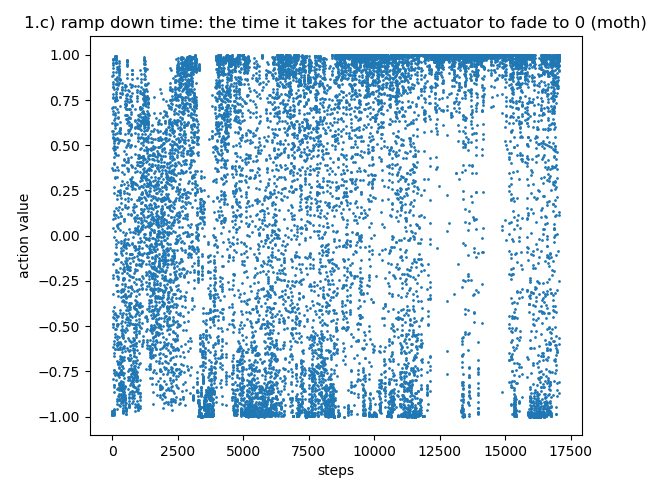

<IPython.core.display.Javascript object>


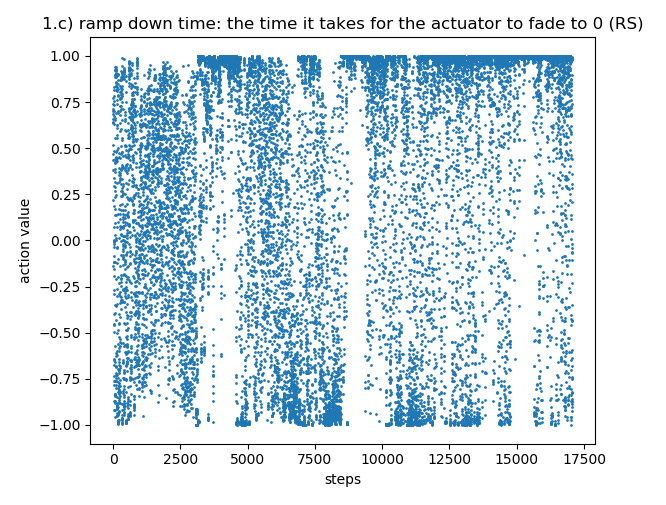

<IPython.core.display.Javascript object>


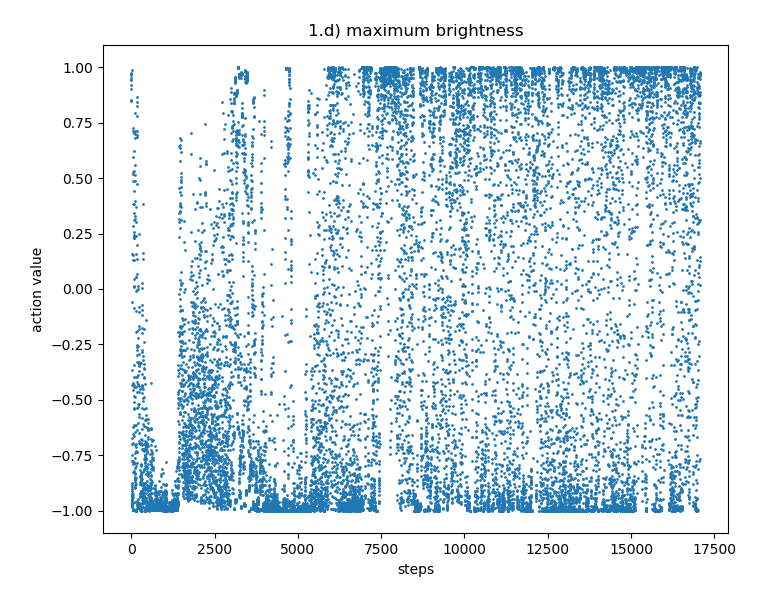

<IPython.core.display.Javascript object>


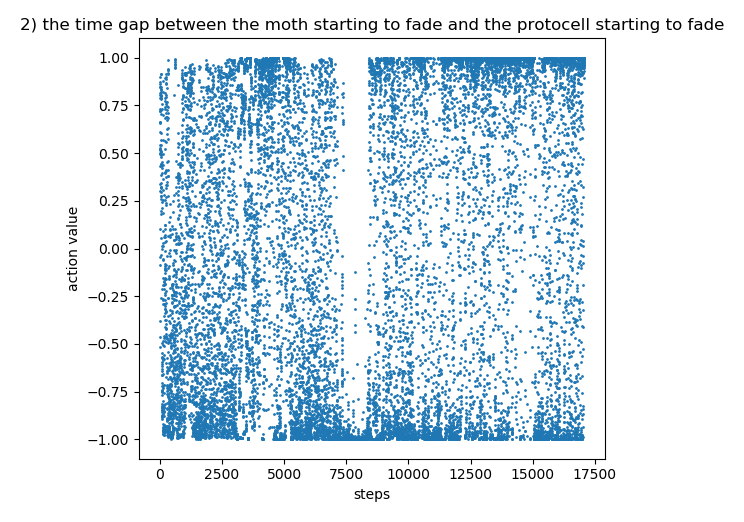

<IPython.core.display.Javascript object>


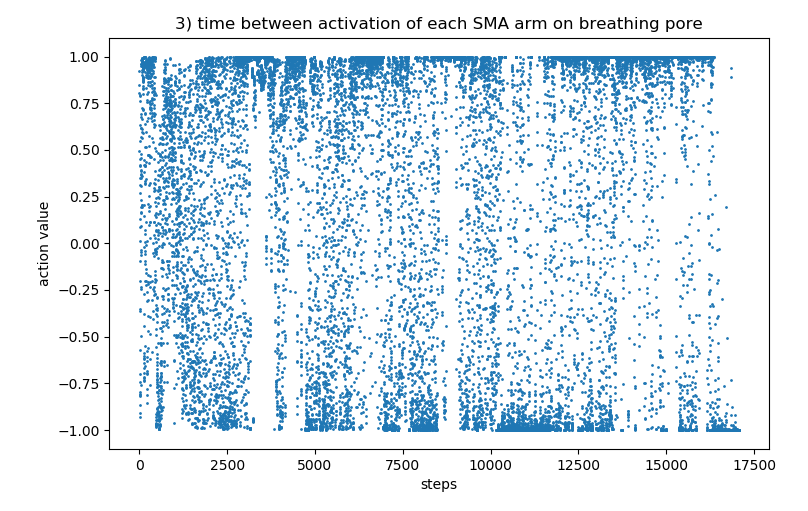

<IPython.core.display.Javascript object>


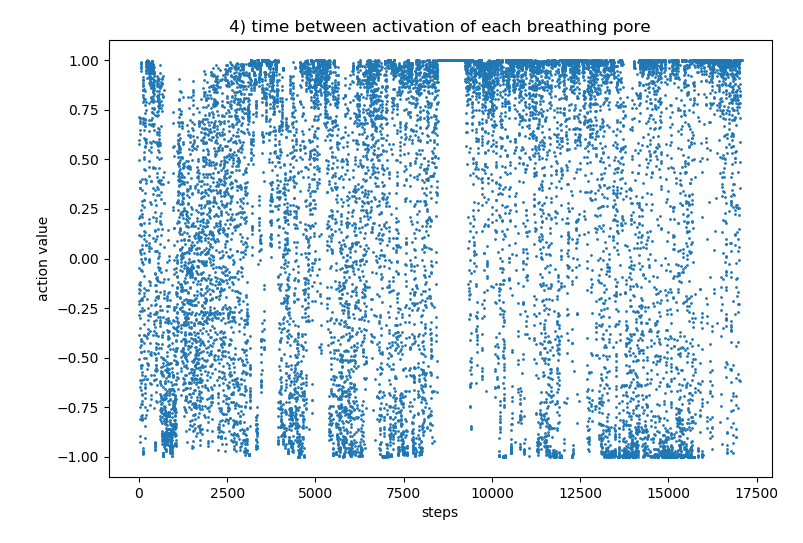

<IPython.core.display.Javascript object>


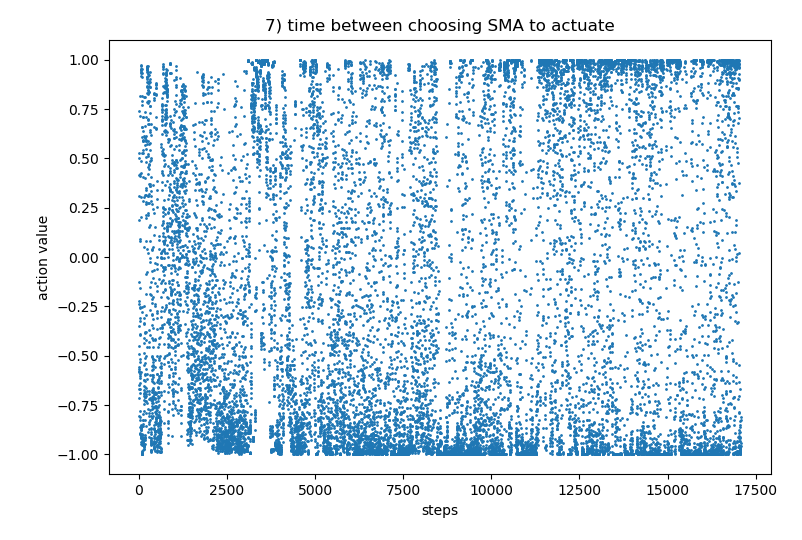

In [30]:
# Convert action into np.array
action = np.array(interaction_data_all['data'][2].tolist())
# define parameter names:
para_name = ["1.a) ramp up time: the time it takes for the actuator to fade to its maximum value (moth)",
             "1.a) ramp up time: the time it takes for the actuator to fade to its maximum value (RS)",
             "1.b) hold time: the time it that the actuator holds at the maximum value (moth)",
             "1.b) hold time: the time it that the actuator holds at the maximum value (RS)",
             "1.c) ramp down time: the time it takes for the actuator to fade to 0 (moth)",
             "1.c) ramp down time: the time it takes for the actuator to fade to 0 (RS)",
             "1.d) maximum brightness",
             "2) the time gap between the moth starting to fade and the protocell starting to fade",
             "3) time between activation of each SMA arm on breathing pore",
             "4) time between activation of each breathing pore",
             "7) time between choosing SMA to actuate"]

num_para = 11
for i in range(num_para):
    plt.figure()
    plt.scatter(np.arange(action.shape[0]), action[:,i], s=1)
#     for separate_line in interaction_data_all['separate_line']:
#         plt.axvline(x = separate_line, color = 'r', linestyle=':')
    plt.xlabel('steps')
    plt.ylabel('action value')
    plt.title(para_name[i])
    plt.tight_layout()
